<a href="https://colab.research.google.com/github/Vrushti-kulkarni/Machine-Learning/blob/main/ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/laptop_pricing_dataset.csv')

In [ ]:
df.head(5)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.isnull().sum()

,0
Manufacturer,0
Category,0
Screen,0
GPU,0
OS,0
CPU_core,0
Screen_Size_cm,4
CPU_frequency,0
RAM_GB,0
Storage_GB_SSD,0


In [ ]:
df.dropna(how = 'any', inplace = True)

In [ ]:
df.shape

(229, 12)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf

In [ ]:
df.dtypes

,0
Manufacturer,object
Category,int64
Screen,object
GPU,int64
OS,int64
CPU_core,int64
Screen_Size_cm,float64
CPU_frequency,float64
RAM_GB,int64
Storage_GB_SSD,int64


In [ ]:
df['Manufacturer'].unique()

array(['Acer', 'Dell', 'HP', 'Asus', 'Lenovo', 'Huawei', 'Toshiba', 'MSI',
       'Razer', 'Samsung', 'Xiaomi'], dtype=object)

In [ ]:
LabelEnc = LabelEncoder()

In [ ]:
df['Manufacturer'] = LabelEnc.fit_transform(df['Manufacturer'])

In [ ]:
df['Screen'] = LabelEnc.fit_transform(df['Screen'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229 entries, 0 to 237
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Manufacturer    229 non-null    int64  
 1   Category        229 non-null    int64  
 2   Screen          229 non-null    int64  
 3   GPU             229 non-null    int64  
 4   OS              229 non-null    int64  
 5   CPU_core        229 non-null    int64  
 6   Screen_Size_cm  229 non-null    float64
 7   CPU_frequency   229 non-null    float64
 8   RAM_GB          229 non-null    int64  
 9   Storage_GB_SSD  229 non-null    int64  
 10  Weight_kg       229 non-null    float64
 11  Price           229 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 23.3 KB


In [ ]:
df['Screen_Size_cm'].describe()

,Screen_Size_cm
count,229.000000
mean,37.290306
std,2.971229
min,30.480000
25%,35.560000
50%,38.100000
75%,39.624000
max,43.942000


In [ ]:
df['Screen_Size_cm'].skew()
#slightly left skewed, but more normally distributed

-0.03621789343847527

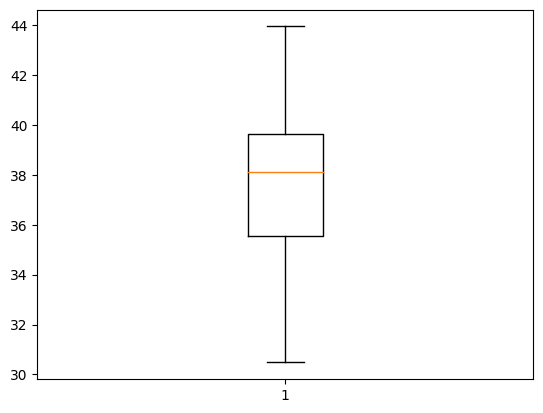

In [ ]:
plt.boxplot(df["Screen_Size_cm"])
plt.show()

In [ ]:
df['Weight_kg'].skew()
#right skewed

0.5122039598003689

<ipython-input-122-906e1435a342>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight_kg'])


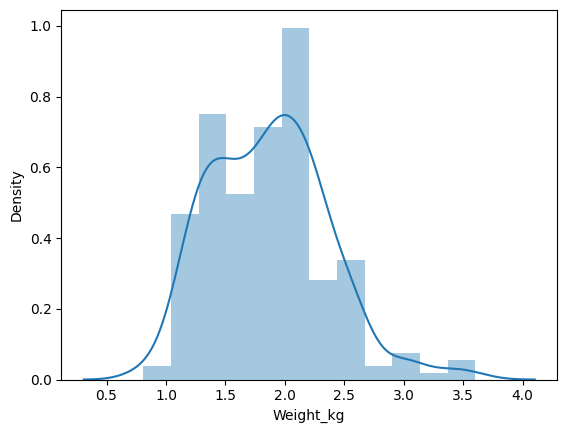

In [ ]:
sns.distplot(df['Weight_kg'])
plt.show()

In [ ]:
df['Weight_kg'].describe()

,Weight_kg
count,229.000000
mean,1.867904
std,0.495122
min,0.810000
25%,1.480000
50%,1.880000
75%,2.200000
max,3.600000


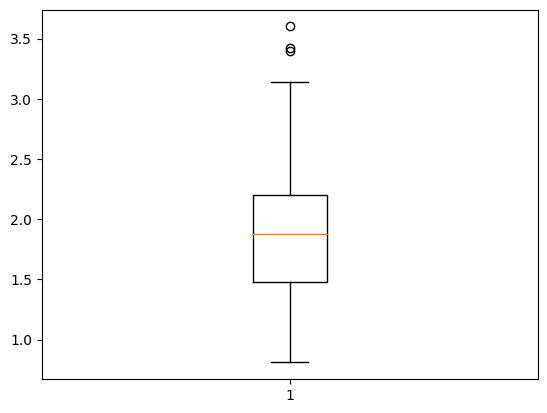

In [ ]:
plt.boxplot(df['Weight_kg'])
plt.show()

**FIND IQR**

In [ ]:
perce25 = df['Weight_kg'].quantile(0.25)
perce75 = df['Weight_kg'].quantile(0.75)

In [ ]:
IQR = perce75 - perce25

In [ ]:
upperlimit = perce75 + (1.5*IQR)
lowerlimit = perce25 - (1.5*IQR)

In [ ]:
upperlimit

3.2800000000000002

In [ ]:
lowerlimit

0.3999999999999997

***found outliers***

In [ ]:
df.loc[df['Weight_kg']> upperlimit]

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
64,1,1,0,3,1,7,43.942,2.9,16,256,3.60,3810
77,2,5,0,3,1,7,43.942,2.9,16,256,3.42,3665
144,5,3,1,3,1,7,43.180,2.8,8,256,3.40,3810


In [ ]:
df.loc[df['Weight_kg']< lowerlimit]


,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price


In [ ]:
newdf = df.drop(df.loc[df['Weight_kg']> upperlimit].index)

In [ ]:
newdf.shape

(226, 12)

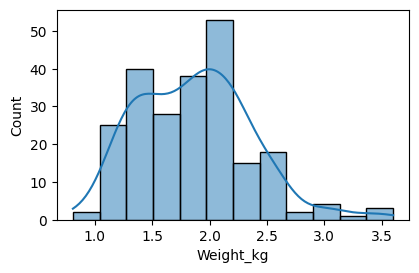

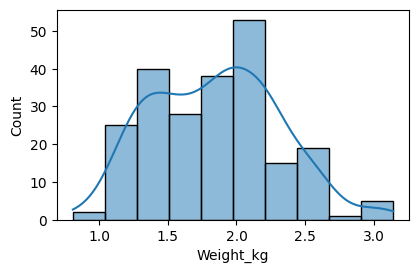

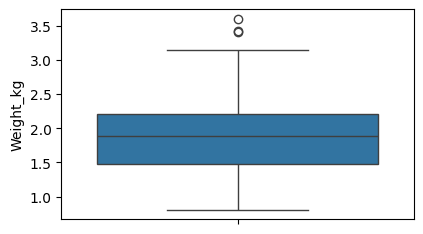

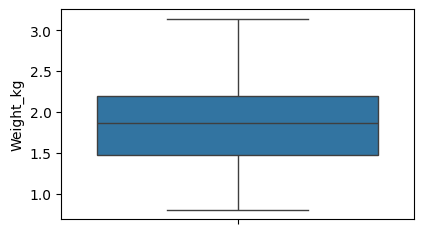

In [ ]:
plt.figure(figsize = (10,6))
plt.subplot(2,2,1)
sns.histplot(df['Weight_kg'], kde = True)

plt.figure(figsize = (10,6))
plt.subplot(2,2,2)
sns.histplot(newdf['Weight_kg'], kde = True)
plt.show()

plt.figure(figsize = (10,6))
plt.subplot(2,2,3)
sns.boxplot(df['Weight_kg'])

plt.figure(figsize = (10,6))
plt.subplot(2,2,4)
sns.boxplot(newdf['Weight_kg'])
plt.show()

In [ ]:
df = df.drop(df.loc[df['Weight_kg']> upperlimit].index)

In [ ]:
df.shape

(226, 12)

In [ ]:
df['Price'].describe()

,Price
count,226.000000
mean,1427.849558
std,512.255903
min,527.000000
25%,1066.500000
50%,1326.000000
75%,1737.000000
max,3301.000000


In [ ]:
df['Price'].skew()
#right skewed

0.8513684587793762

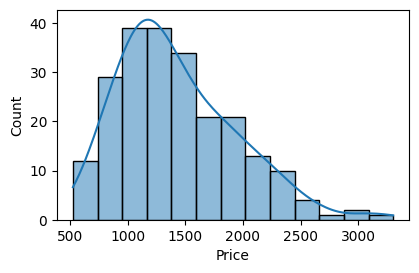

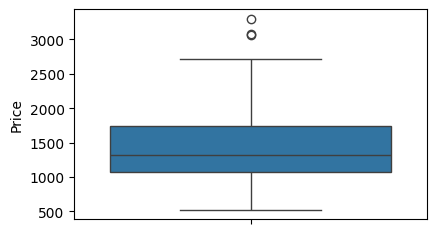

In [ ]:
plt.figure(figsize = (10,6))
plt.subplot(2,2,1)
sns.histplot(df['Price'], kde = True)

plt.figure(figsize = (10,6))
plt.subplot(2,2,2)
sns.boxplot(df['Price'])
plt.show()

In [ ]:
quant25 = df['Price'].quantile(0.25)
quant75 = df['Price'].quantile(0.75)

In [ ]:
IQR = quant75 - quant25

In [ ]:
UL = quant75 + (1.5*IQR)
LL = quant25 - (1.5*IQR)

In [ ]:
df.loc[df['Price']>UL]

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
121,2,5,0,3,1,7,39.624,2.8,8,256,1.78,3059
159,7,1,0,3,1,7,35.560,2.8,16,256,1.95,3301
180,3,5,0,3,1,7,39.624,2.8,16,256,2.60,3073


In [ ]:
df = df.drop(df.loc[df['Price']>UL].index)

In [ ]:
df.shape

(223, 12)

In [ ]:
df.head(5)

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,4,1,2,1,5,35.560,1.6,8,256,1.60,978
1,2,3,0,1,1,3,39.624,2.0,4,256,2.20,634
2,2,3,0,1,1,7,39.624,2.7,8,256,2.20,946
3,2,4,1,2,1,5,33.782,1.6,8,128,1.22,1244
4,3,4,0,2,1,7,39.624,1.8,8,256,1.91,837


**Underfit : High training and testing RMSE  
Good fit : Low training and testing RMSE  
Overfit : Low training RMSE but high testing RMSE**

# **SIMPLE LINEAR REGRESSION**
***mae = 290.53955770940723***     
***mse = 132399.5763616827***       
***r2 = 0.4912572182467304***     
***rmse = 363.86752584104386***     


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Price', axis = 1), df['Price'], test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()


In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

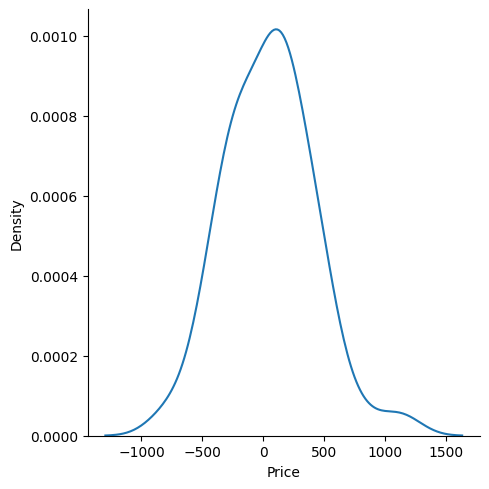

In [ ]:
sns.displot(y_test - y_pred, kind = 'kde')

In [ ]:
lr.score(X_test, y_test)

0.4912572182467304

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(mae)

290.53955770940723


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

132399.5763616827


In [ ]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.4912572182467304


In [ ]:
residuals = y_test - y_pred

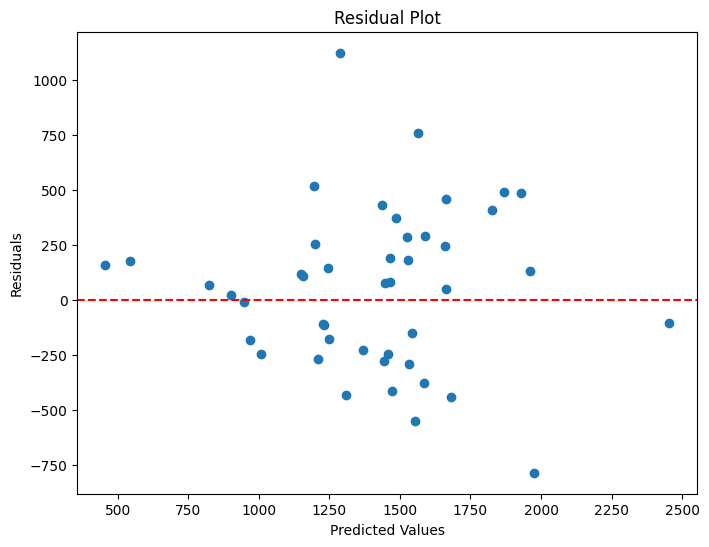

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
df['Price'].describe()

,Price
count,223.000000
mean,1404.757848
std,474.800105
min,527.000000
25%,1061.500000
50%,1310.000000
75%,1714.000000
max,2712.000000


In [ ]:
test_rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print(test_rmse)
#very high rmse, very high error, less accuracy of model

363.86752584104386


In [ ]:
train_rmse = np.sqrt(mean_squared_error(y_train, lr.predict(X_train)))
print(train_rmse)

300.64497180520533


In [ ]:
ytrain_pred = lr.predict(X_train)
ytest_pred= lr.predict(X_test)


In [ ]:
test_rmse=np.sqrt(mean_squared_error(y_test,ytest_pred))
train_rmse=np.sqrt(mean_squared_error(y_train,ytrain_pred))
print(test_rmse)
print(train_rmse)

363.86752584104386
300.64497180520533


# **SUPPORT VECTOR REGRESSION**
   
***rmse = 362.27643563747466***       
***r2 = 0.4956966685302955***

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr_reg = SVR(kernel = 'linear', C = 15.0, epsilon = 1.0)

In [ ]:
svr_reg.fit(X_train, y_train.ravel())
#ravel is used to convert 1D because that is how svr requires

SVR(C=15.0, epsilon=1.0, kernel='linear')

In [ ]:
y_train_pred = svr_reg.predict(X_train)
y_test_pred = svr_reg.predict(X_test)

In [ ]:
print(np.sqrt(mean_squared_error(y_train ,y_train_pred)))
print(np.sqrt(mean_squared_error(y_test ,y_test_pred)))

307.00406032144633
363.1561376289152


In [ ]:
svr_reg.score(X_train ,y_train)

0.5607078308081249

In [ ]:
svr_reg.score(X_test ,y_test)


0.4932445340041397

**GRID SEARCH**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'C' : [0.1, 1, 10, 100,200, 300],
    'epsilon' : [0.01, 0.1, 1, 10],
    'gamma' : ['auto','scale'], #gamma decides shape of decision boundar
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']
}
grid = GridSearchCV(SVR(), param_grid, cv = 10, scoring = 'neg_mean_squared_error', verbose = 1)
grid.fit(X_train, y_train.ravel())

print(grid.best_params_)
print("Best score:", grid.best_score_)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits
{'C': 300, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}
Best score: -98279.93528380882


***what was suggested***

In [ ]:
svr_reg = SVR(kernel = 'rbf', C = 300, epsilon = 0.1, gamma = 'scale')

In [ ]:
svr_reg.fit(X_train, y_train.ravel())

SVR(C=300)

In [ ]:
y_pred = svr_reg.predict(X_test)
y_train_pred = svr_reg.predict(X_train)

In [ ]:
print(np.sqrt(mean_squared_error(y_train ,y_train_pred)))
print(np.sqrt(mean_squared_error(y_test ,y_pred)))

251.58952398408977
362.27643563747466


In [ ]:
svr_reg.score(X_train ,y_train)
svr_reg.score(X_test ,y_test)

0.4956966685302955

***done in infomatrix file***

In [ ]:
svr_reg = SVR(kernel='linear', C=100, epsilon=0.5,gamma='scale')
model=svr_reg.fit(X_train,y_train.ravel())

In [ ]:
ytrain_pred=svr_reg.predict(X_train)
ytest_pred=svr_reg.predict(X_test)

In [ ]:
print(np.sqrt(mean_squared_error(y_train ,ytrain_pred)))
print(np.sqrt(mean_squared_error(y_test ,ytest_pred)))

304.297256027046
368.13499598157534


# **Random Forest Regression**
***mse = 90391.28206925013***     
***rmse = 300.6514295147291***     
***r2 = 0.5786996991809273***

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(bootstrap = True, min_impurity_decrease=0.01, oob_score = True, verbose = 1)

#criterion is used like a metric, Possible criterions are “squared_error”, “absolute_error”, “friedman_mse”, “poisson”. squared_error is the default criterion.
#bootstrap is allowing duplication of subsets given to Decision Trees, avoids overfitting
#n_estimator is to decide number of decision trees
#min_impurity_decrease is stopping parameter, stops when it is not making much improvement
#oob_score = out of bag score, when enabled, gives a out of bound datapoint to see the models reaction
#warm_start is allowing or not allowing the next tree to use output of the previous tree


In [ ]:
rf.fit(X_train, y_train.ravel())

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


RandomForestRegressor(min_impurity_decrease=0.01, oob_score=True, verbose=1)

In [ ]:
ytrain_pred = rf.predict(X_train)
ytest_pred = rf.predict(X_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [ ]:
print(f'Training RMSE : {np.sqrt(mean_squared_error(y_train,ytrain_pred))}\nTesting RMSE : {np.sqrt(mean_squared_error(y_test, ytest_pred))}')

Training RMSE : 107.31239620800578
Testing RMSE : 325.81177679008863


In [ ]:
print(f'Training R2 score : {rf.score(X_train,y_train)}')
print(f'Testing R2 score : {rf.score(X_test ,y_test)}')

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Training R2 score : 0.9463258707233057
Testing R2 score : 0.5921079682626695


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [ ]:
param_grid = {
    'n_estimators' : [100, 200, 300, 400, 500],
    'min_samples_split' : [2, 4, 6, 8, 10],
    'min_impurity_decrease':[0.01,0.1,0.5],
    'bootstrap':[True,False]
}

grid = GridSearchCV(RandomForestRegressor(), param_grid, cv = 10, scoring = 'neg_mean_squared_error')
grid.fit(X_train, y_train.ravel())
print(grid.best_estimator_)
print(f"Best Hyperparameters: {grid.best_params_}")
print(f"Best Score: {grid.best_score_}")

RandomForestRegressor(min_impurity_decrease=0.01, n_estimators=300)
Best Hyperparameters: {'bootstrap': True, 'min_impurity_decrease': 0.01, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: -73318.33787163292


In [ ]:
rf = RandomForestRegressor(bootstrap =  True, min_impurity_decrease = 0.1, oob_score = True, verbose = 1, min_samples_split = 2, n_estimators = 100)

In [ ]:
rf.fit(X_train, y_train.ravel())

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


RandomForestRegressor(min_impurity_decrease=0.1, oob_score=True, verbose=1)

In [ ]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [ ]:
print(f'Training RMSE : {np.sqrt(mean_squared_error(y_train,y_train_pred))}\nTesting RMSE : {np.sqrt(mean_squared_error(y_test, y_test_pred))}')

Training RMSE : 102.47425233192565
Testing RMSE : 328.01255152616994


In [ ]:
print(f'Training R2 score : {rf.score(X_train,y_train)}')
print(f'Testing R2 score : {rf.score(X_test ,y_test)}')

Training R2 score : 0.9510565319360519
Testing R2 score : 0.5865789460709858


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


# **RIDGE REGRESSION L2 REGULARISATION**
***mse = 132167.67571669852    
rmse = 363.54872536800144     
r2 = 0.4921482919379131     
mae = 290.20100019902924***

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [ ]:
ytrain_pred_ridge = ridge.predict(X_train)
ytest_pred_ridge = ridge.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, ytest_pred_ridge)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

132167.67571669852
363.54872536800144


In [ ]:
mae = mean_absolute_error(y_test, ytest_pred_ridge)
print(mae)

290.20100019902924


In [ ]:
r2 = r2_score(y_test, ytest_pred_ridge)
print(r2)

0.4921482919379131
